In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def formSkill(result_randomgroup):
    difference=result_randomgroup['skill_group_penetration_rate_2018']-result_randomgroup['skill_group_penetration_rate_2015']
    result_randomgroup['pen_difference'] = difference.values
    return result_randomgroup


In [ ]:
def form10k(random_group):
    difference=random_group['net_per_10K_2018']-random_group['net_per_10K_2015']
    random_group['10k_difference']=difference.values
    return random_group

In [3]:
def outlier(dataset):
    dataset1=sorted(dataset)
    q1, q3= np.percentile(dataset1,[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr) 
    return lower_bound,upper_bound

In [4]:
def findoutlier(pendiff,tenkfinall,attributes,pen_lower,pen_upper):
    pen_outlier=[]
    for i in range(len(pendiff)):
        if pendiff[i]<=pen_lower or pendiff[i] >=pen_upper:
            pen_outlier.append([attributes[i],pendiff[i],tenkfinall[i]])
    return pen_outlier
        
    

In [20]:
def count_samesign(pendiff,tenkdiff):
    cnt=0
    cnt1=0
    for i in range(len(pendiff)):
        if pendiff[i] >=0 and tenkdiff[i]>=0:
            cnt +=1
        else:
            cnt1 +=1
    return cnt,cnt1     

In [5]:
df_indskill = pd.read_excel("/Users/tanya/Downloads/public_use-industry-skills-needs.xlsx", sheet_name='Industry Skills Needs')
df_industry=pd.read_excel("/Users/tanya/Downloads/public_use-talent-migration.xlsx", sheet_name='Industry Migration')
df_skill=pd.read_excel("/Users/tanya/Downloads/public_use-talent-migration.xlsx", sheet_name='Skill Migration')
df_penetration=pd.read_excel("/Users/tanya/Downloads/public_use-skill-penetration.xlsx", sheet_name='Skill Penetration')

In [6]:
df_pen=df_penetration.groupby(['year','isic_section_name','industry_name','skill_group_name']).sum()
df_pen=df_pen.sort_values(['year','isic_section_name','industry_name','skill_group_penetration_rate'],ascending=False)
df_pen=df_pen.groupby(['year','isic_section_name','industry_name']).head(10)

In [7]:
# for i in range(len(df_pen.reset_index()['year'])):
#     if df_pen.reset_index()['year'][i]==2017:
#         print(i)
#         break
# for i in range(len(df_pen.reset_index()['year'])):
#     if df_pen.reset_index()['year'][i]==2016:
#         print(i)
#         break
# for i in range(len(df_pen.reset_index()['year'])):
#     if df_pen.reset_index()['year'][i]==2015:
#         print(i)
#         break
# 710,1420,2130

In [7]:
df_pen2018=df_pen.iloc[:710].reset_index().drop(columns=['year'])
df_pen2017=df_pen.iloc[710:1420].reset_index().drop(columns=['year'])
df_pen2016=df_pen.iloc[1420:2130].reset_index().drop(columns=['year'])
df_pen2015=df_pen.iloc[2130:].reset_index().drop(columns=['year'])

df_pen2018=df_pen2018.rename(columns={'skill_group_penetration_rate':'skill_group_penetration_rate_2018'})
df_pen2017=df_pen2017.rename(columns={'skill_group_penetration_rate':'skill_group_penetration_rate_2017'})
df_pen2016=df_pen2016.rename(columns={'skill_group_penetration_rate':'skill_group_penetration_rate_2016'})
df_pen2015=df_pen2015.rename(columns={'skill_group_penetration_rate':'skill_group_penetration_rate_2015'})

In [8]:
result1=pd.merge(df_pen2015,df_pen2016,how='inner',on=['isic_section_name','industry_name','skill_group_name'])
result2=pd.merge(df_pen2017,df_pen2018,how='inner',on=['isic_section_name','industry_name','skill_group_name'])
result=pd.merge(result1,result2,how='inner',on=['isic_section_name','industry_name','skill_group_name'])
# result

In [9]:
result_skillgroup=result.groupby('skill_group_name')['skill_group_penetration_rate_2015','skill_group_penetration_rate_2018'].sum()
result_skillgroup=formSkill(result_skillgroup)

skill_group=df_skill.groupby('skill_group_name')['net_per_10K_2015','net_per_10K_2018'].sum()
skill_group=form10k(skill_group)

result_skill=pd.merge(result_skillgroup,skill_group,how='inner',on=['skill_group_name'])
# result_skill

In [10]:
result_industrygroup=result.groupby('industry_name')['skill_group_penetration_rate_2015','skill_group_penetration_rate_2018'].sum()
result_industrygroup=formSkill(result_industrygroup)

industry_group=df_industry.groupby('industry_name')['net_per_10K_2015','net_per_10K_2018'].sum()
industry_group=form10k(industry_group)

result_industry=pd.merge(result_industrygroup,industry_group,how='inner',on=['industry_name'])
# result_industry

In [11]:
attributes=result_skill.reset_index()['skill_group_name'].tolist()
pendiff=result_skill['pen_difference'].tolist()
tenkdiff=result_skill['10k_difference'].tolist()
tenk=[]
for i in tenkdiff:
    i=i/10000
    tenk.append(i)
tenkfinall=tenk

In [12]:
pen_lower,pen_upper=outlier(pendiff)
ten_lower,ten_upper=outlier(tenkdiff)


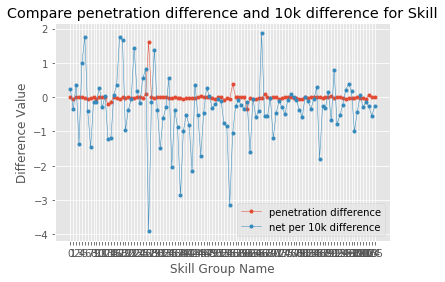

<Figure size 7200x7200 with 0 Axes>

In [13]:
with plt.style.context("ggplot"):
    plt.plot(pendiff, linewidth = 0.5, marker='.', label = "penetration difference")
    plt.plot(tenkfinall, linewidth = 0.5, marker='.', label = "net per 10k difference")
    plt.xticks(range(len(attributes)))
    plt.xlabel("Skill Group Name")
    plt.ylabel("Difference Value")
    plt.yscale("linear")
    plt.legend(loc="best")
    plt.title("Compare penetration difference and 10k difference for Skill")
    plt.figure(figsize=(100,100))

In [14]:
pen_skill=findoutlier(pendiff,tenkdiff,attributes,pen_lower,pen_upper)
# pen_skill
ten_skill=findoutlier(tenkdiff,pendiff,attributes,ten_lower,ten_upper)
# ten_skill

In [21]:
countyes,countno=count_samesign(pendiff,tenkdiff)

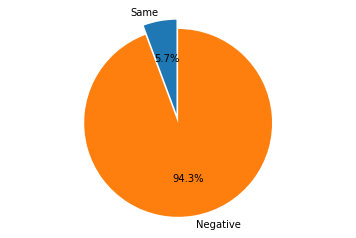

In [27]:
labels = 'Same', 'Negative'
sizes = [countyes,countno]
explode = (0.1, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  

plt.show()

In [15]:
attributesind=result_industry.reset_index()['industry_name'].tolist()
pendiffind=result_industry['pen_difference'].tolist()
tenkdiffind=result_industry['10k_difference'].tolist()
tenkind=[]
for i in tenkdiffind:
    i=i/10000
    tenkind.append(i)
tenkfinallind=tenkind

In [16]:
penind_lower,penind_upper=outlier(pendiffind)
tenind_lower,tenind_upper=outlier(tenkdiffind)

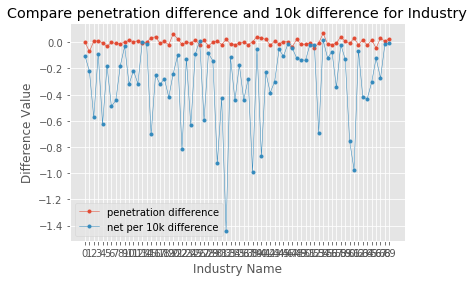

<Figure size 3600x3600 with 0 Axes>

In [17]:
with plt.style.context("ggplot"):
    plt.plot(pendiffind, linewidth = 0.5, marker='.', label = "penetration difference")
    plt.plot(tenkfinallind, linewidth = 0.5, marker='.', label = "net per 10k difference")
    plt.xticks(range(len(attributesind)))
    plt.xlabel("Industry Name")
    plt.ylabel("Difference Value")
    plt.yscale("linear")
    plt.legend(loc="best")
    plt.title("Compare penetration difference and 10k difference for Industry")
    plt.figure(figsize=(50,50))

In [18]:
pen_ind=findoutlier(pendiffind,tenkdiffind,attributesind,penind_lower,penind_upper)
# pen_ind
ten_ind=findoutlier(tenkdiffind,pendiffind,attributesind,tenind_lower,tenind_upper)
# ten_ind

In [23]:
countyesind,countnoind=count_samesign(pendiffind,tenkdiffind)

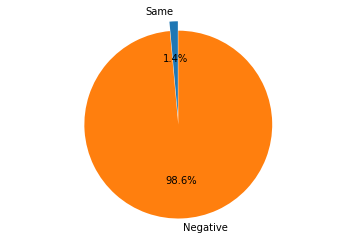

In [28]:
labels = 'Same', 'Negative'
sizes = [countyesind,countnoind]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()